# DATA VISUALIZER

Run this visualizer after running main.ipynb

In [1]:
import open3d as o3d
import glob
import os
import sys
import cv2
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline
from pprint import pprint as pp
import pickle

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [4]:
root_path= r"C:\Users\lfcas\Documents\Internship\3D_Generation\Demo_Felipe\Plants\Fountain"

#paths to images and their features
image_paths = sorted(glob.glob(os.path.join(root_path, 'images', '*.jpg' )))
feature_paths = sorted(glob.glob(os.path.join(root_path, 'features', '*.pkl')))
match_paths = sorted(glob.glob((os.path.join(root_path, 'matches', '*.pkl'))))
points_paths = sorted(glob.glob((os.path.join(root_path, 'points', '*.ply'))))

## SIFT Visualization

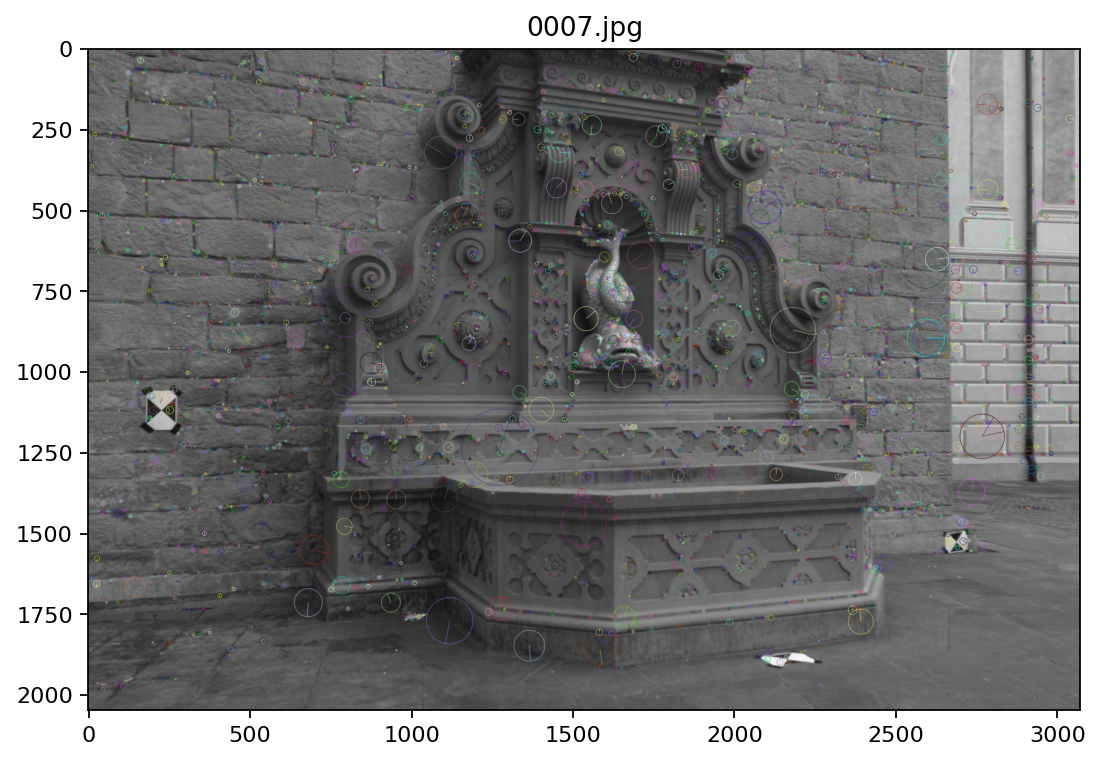

In [85]:
#image number
img_n = 7

keypoints = []
descriptors = []

img = cv2.imread(image_paths[img_n])
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

features = pickle.load(open(feature_paths[img_n], "rb"))
for point in features:
    keypoint = cv2.KeyPoint(x=point[0][0], y=point[0][1], _size=point[1], _angle=point[2],
                            _response=point[3], _octave=point[4], _class_id=point[5])
    descriptor = point[6]
    keypoints.append(keypoint)
    descriptors.append(descriptor)


img = cv2.drawKeypoints(gray,keypoints,img, flags =cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.figure(figsize= (8,6),dpi =160)
plt.title(image_paths[img_n][image_paths[img_n].rfind('\\') + 1:])
plt.imshow(img)

## Matches Visualizer

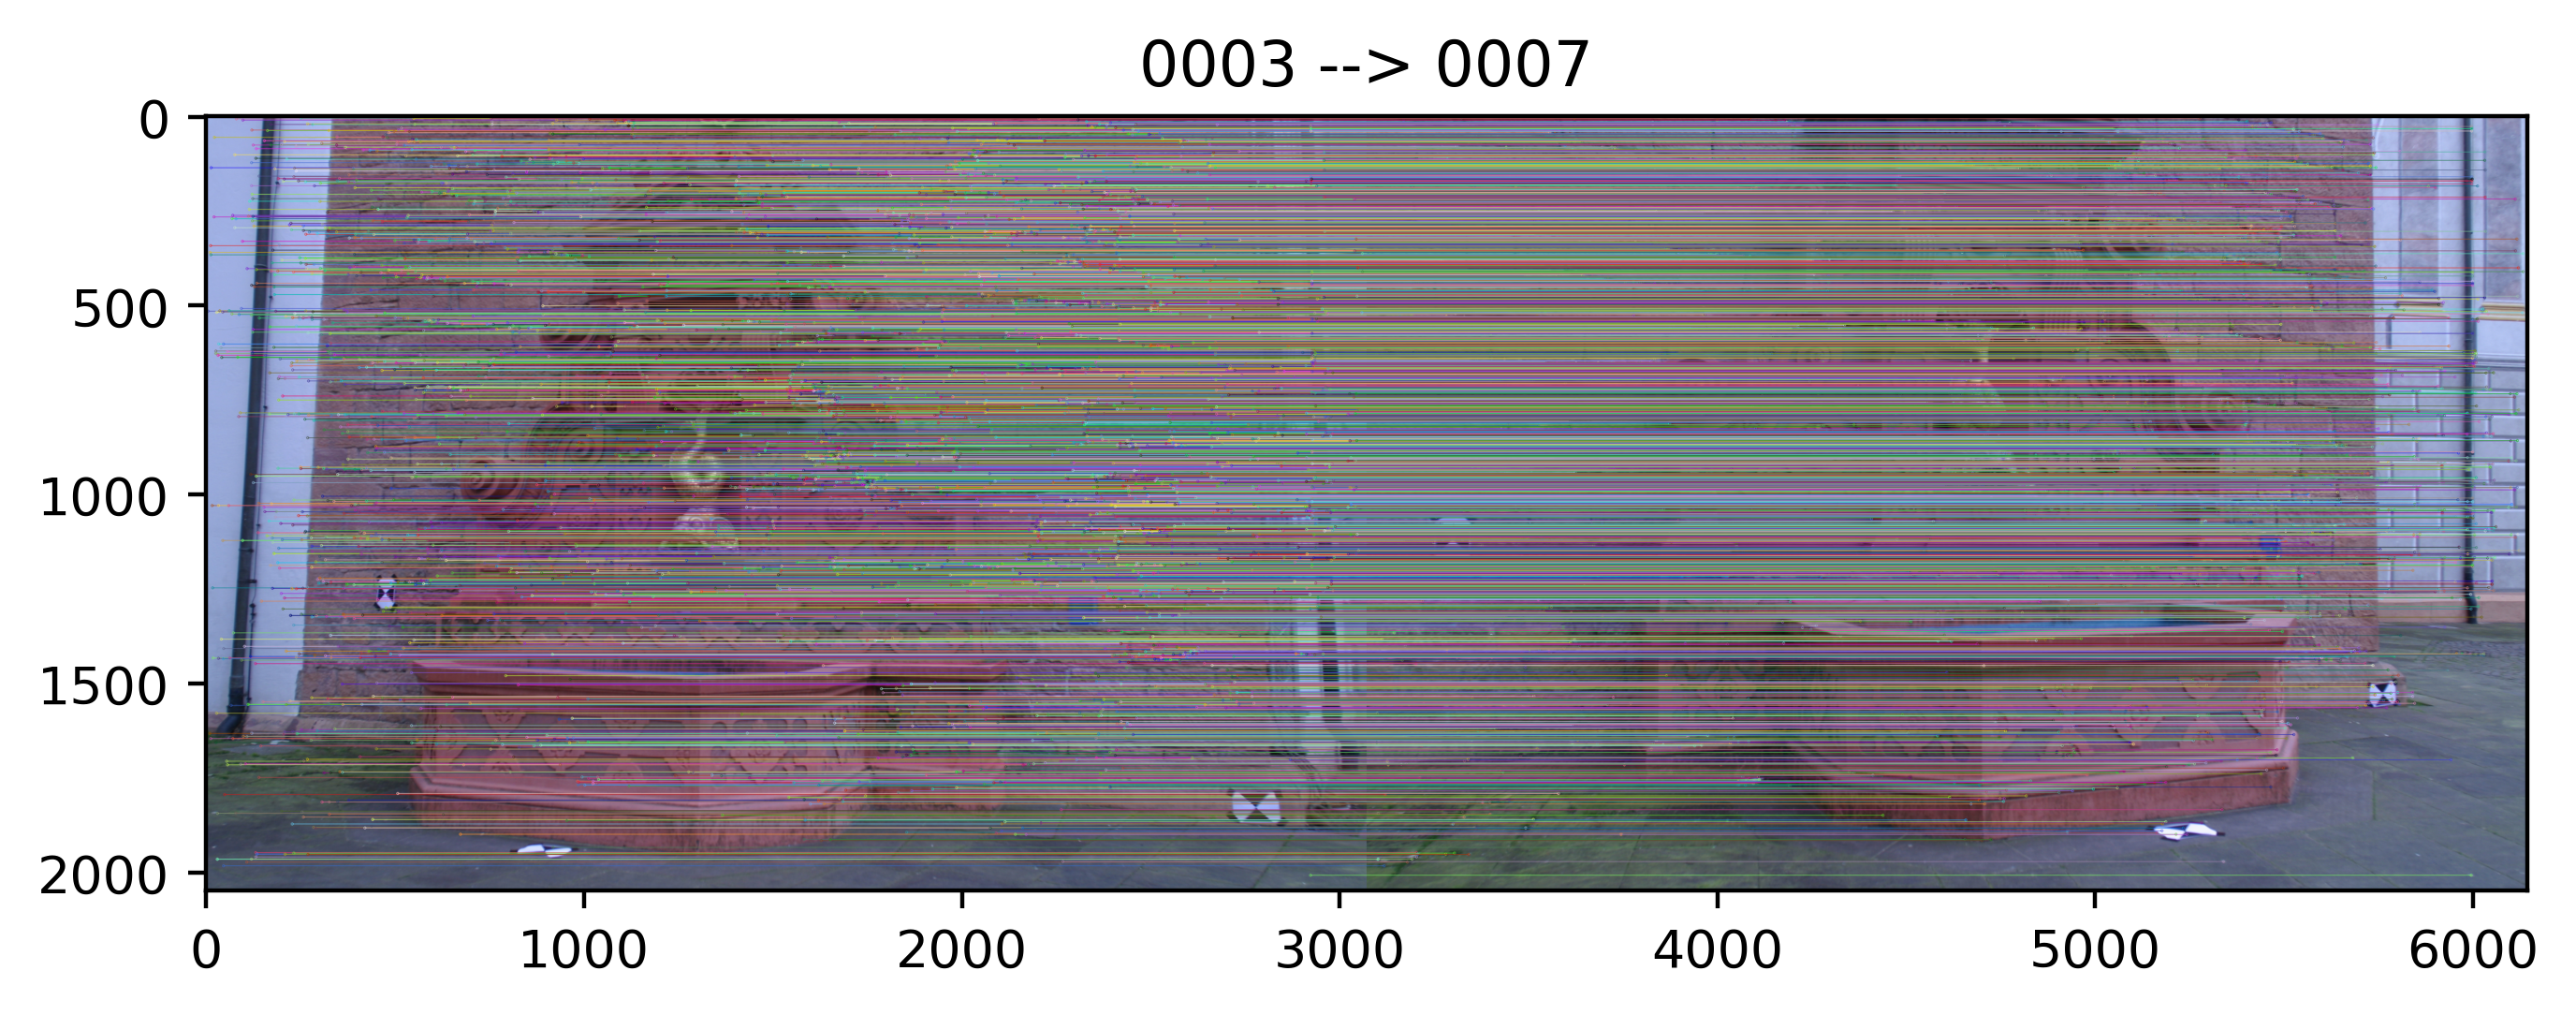

In [92]:
img_name1, img_name2 = ('', '')# Name of images to visualize
mt_n = 30 # match number if names aren't given
image_format = '.jpg'
f_format = '.pkl'


if not img_name1:
    img_name1 = match_paths[mt_n][match_paths[mt_n].rfind('\\') + 1 : match_paths[mt_n].rfind('_')  ]
    img_name2 = match_paths[mt_n][match_paths[mt_n].rfind('_') + 1 : -4]


#Image 1
#Paths
img_path1 = os.path.join(root_path, 'images', img_name1 + image_format)
f_path1 = os.path.join(root_path, 'features' , img_name1 + f_format)

#Reading
img1 = cv2.imread(img_path1)
f1 = pickle.load(open(f_path1, "rb"))

kp1 = []
d1 = []

for point in features:
    kp = cv2.KeyPoint(x=point[0][0], y=point[0][1], _size=point[1], _angle=point[2],
                            _response=point[3], _octave=point[4], _class_id=point[5])
    d = point[6]
    kp1.append(kp)
    d1.append(d)

    
#Image 2

img_path2 = os.path.join(root_path, 'images', img_name2 + image_format)
f_path2 = os.path.join(root_path, 'features' , img_name2 + f_format)

#Reading
img2 = cv2.imread(img_path2)
f2 = pickle.load(open(f_path2, "rb"))

kp2 = []
d2 = []

for point in features:
    kp = cv2.KeyPoint(x=point[0][0], y=point[0][1], _size=point[1], _angle=point[2],
                            _response=point[3], _octave=point[4], _class_id=point[5])
    d = point[6]
    kp2.append(kp)
    d2.append(d)
    

'''
Ran Matcher again b/c could make them acceptable for cv2.drawMatches by reading them from file

distances = []
indices1 = []
indices2 = []

matches = pickle.load(open(match_paths[mt_n],'rb'))

for point in matches:
    distances.append(point[0])
    indices1.append(point[1])
    indices2.append(point[2])      
'''

bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck = True)
matches = bf.match(np.array(d1),np.array(d2))
matches = sorted(matches, key=lambda x: x.distance)
matched_image = cv2.drawMatches(img1,kp1,img2,kp2, matches, None, flags = 2)

plt.figure(figsize= (8,6),dpi =400)
plt.title(img_name1 + ' --> ' +img_name2)
plt.imshow(cv2.cvtColor(matched_image, cv2.COLOR_BGR2RGB))
plt.show() 

## SfM Visualizer

In [4]:
n_images = 9 #2 or more images for reconstruction


cloud = o3d.io.read_point_cloud(points_paths[n_images]) # Read the point cloud
o3d.visualization.draw_geometries([cloud])   
downpcd = cloud.voxel_down_sample(voxel_size=0.05)
o3d.visualization.draw_geometries([downpcd])
downpcd.estimate_normals(search_param=o3d.geometry.KDTreeSearchParamHybrid(
        radius=0.1, max_nn=30))
o3d.visualization.draw_geometries([downpcd])

[Open3D WARNING] [ViewControl] SetViewPoint() failed because window height and width are not set.


In [4]:
path = r'C:\Users\lfcas\Documents\MeshroomCache\MeshFiltering\056e7215ea251133c77d0aad0d33c8ee63d73984\mesh.obj'
cloud = o3d.io.read_point_cloud(path)
o3d.visualization.draw_geometries([cloud])   

[Open3D WARNING] Read geometry::PointCloud failed: unknown file extension for C:\Users\lfcas\Documents\MeshroomCache\MeshFiltering\056e7215ea251133c77d0aad0d33c8ee63d73984\mesh.obj (format: auto).
